plot the mean elevation and slope of the primary wet forest

In [1]:
import numpy as np
import os
from os.path import join
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker
import seaborn as sns


def subplot_twin_axes(ax_twin, list_year, array_dem, array_slope, x_axis_interval=3, y_axis_interval=None,
                      title=None, plot_legend=True,
                      x_axis_label=None,
                      y_label_left='SRTM elevation (m)',
                      y_label_right='SRTM slope (degree)',
                      y_left_lim=None, y_right_lim=None):
    """
        plot the mean elevation and slope of the primary wet forest for Haiti and the Dominican Republic using SRTM and HAND dataset
    """

    sns.set_theme(style="white")
    legend_size = 26
    tick_label_size = 26
    axis_label_size = 32
    title_label_size = 30
    tick_length = 4
    lw = 2.5

    ax_twin.plot(list_year, array_dem, label='elevation', color='#4c72b0',
                 linewidth=lw, linestyle='solid',
                 marker='o', markersize=10, markerfacecolor='#4c72b0',
                 markeredgewidth=2, markeredgecolor='#4c72b0')

    ax_twin.tick_params('x', labelsize=tick_label_size, direction='out', length=tick_length, bottom=True, which='major')
    ax_twin.tick_params('y', labelsize=tick_label_size, direction='out', length=tick_length, left=True, which='major', colors='#4c72b0')

    ax_twin.set_xlabel(x_axis_label, size=axis_label_size)
    ax_twin.set_ylabel(y_label_left, size=axis_label_size, color='#4c72b0')

    if y_left_lim is not None:
        ax_twin.set_ylim(y_left_lim)

    if y_axis_interval is None:
        pass
    else:
        ax_twin.yaxis.set_major_locator(plticker.MultipleLocator(base=y_axis_interval))
    ax_twin.xaxis.set_major_locator(plticker.MultipleLocator(base=x_axis_interval))

    ax_twin.yaxis.offsetText.set_fontsize(tick_label_size)
    ax_twin.set_title(title, fontsize=title_label_size)

    ax2 = ax_twin.twinx()
    ax2.plot(list_year, array_slope, label='slope', color='#ff4500',
             linewidth=lw, linestyle='solid',
             marker='s', markersize=10, markerfacecolor='#ff4500',
             markeredgewidth=2, markeredgecolor='#ff4500')

    ax2.tick_params('x', labelsize=tick_label_size, direction='out', length=tick_length, bottom=True, which='major')
    ax2.tick_params('y', labelsize=tick_label_size, direction='out', length=tick_length, left=False, which='major', colors='#ff4500')

    ax2.set_ylabel(y_label_right, size=axis_label_size, color='#ff4500')

    if y_right_lim is not None:
        ax2.set_ylim(y_right_lim)

    lines, labels = ax_twin.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()

    if plot_legend:
        ax_twin.legend(lines + lines2, labels + labels2, loc='lower center', fontsize=legend_size, frameon=False)


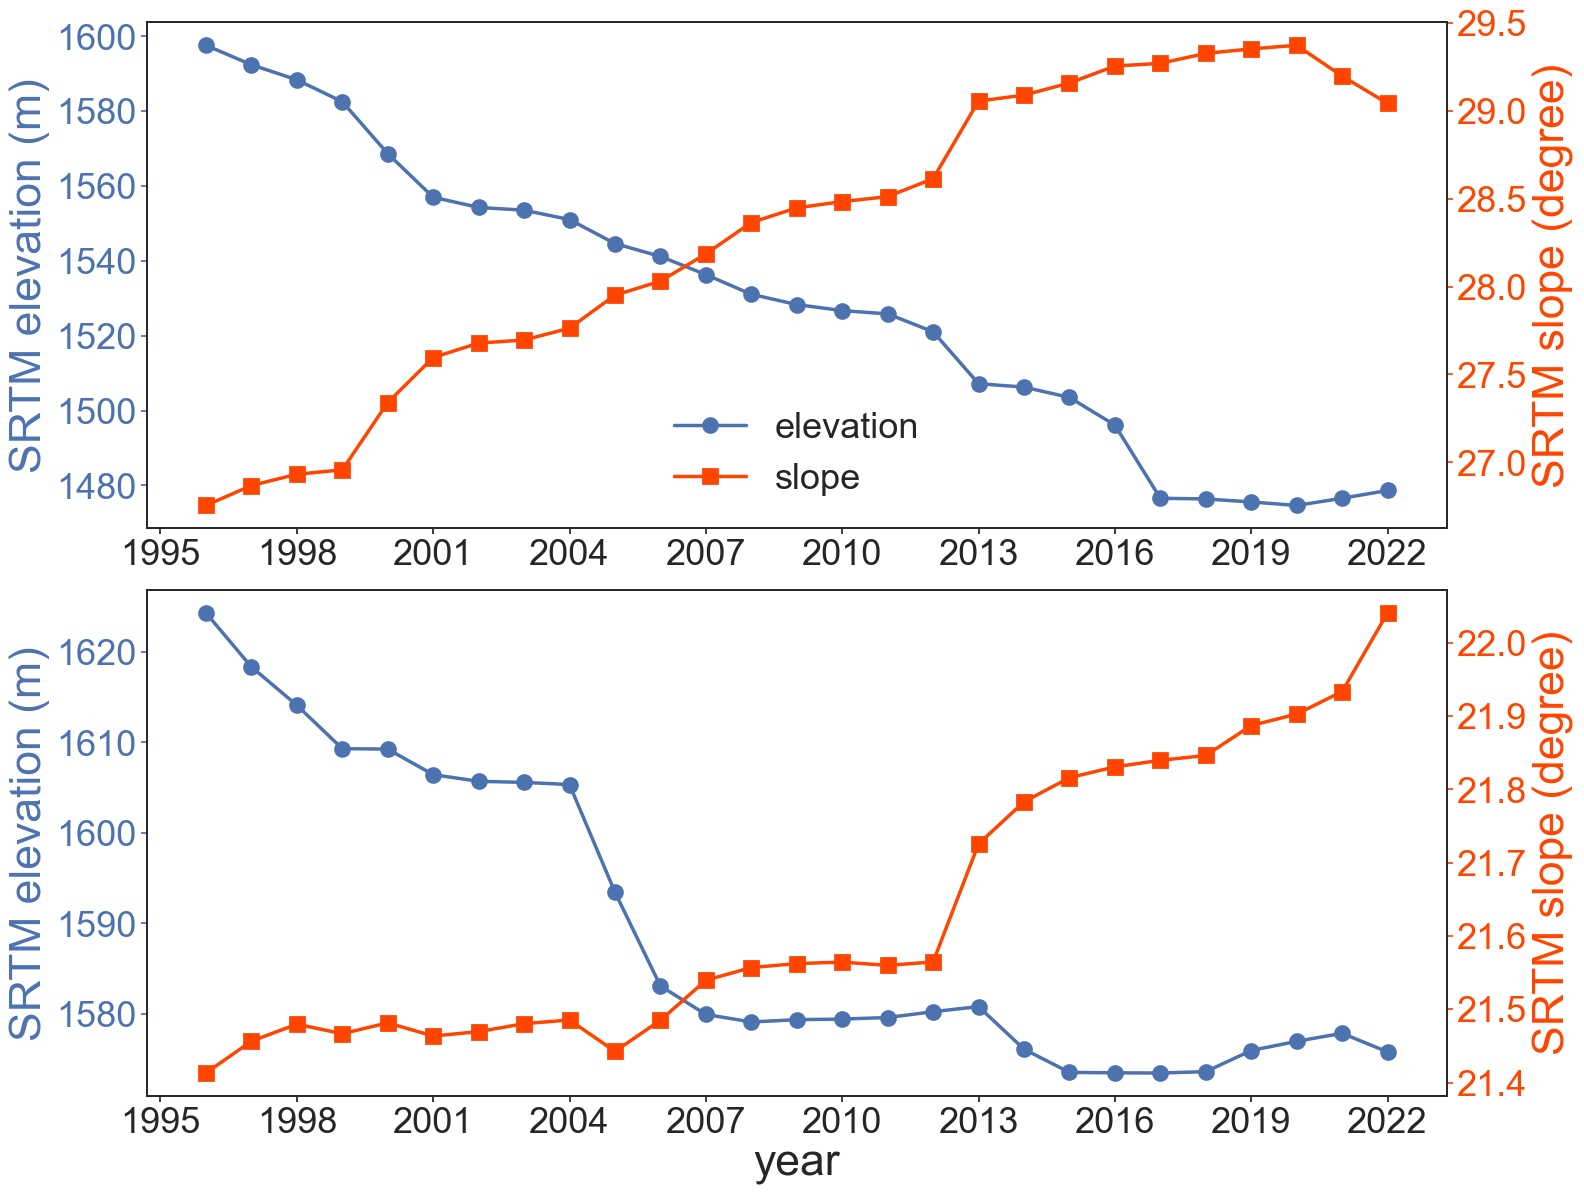

In [2]:
pwd = os.getcwd()
rootpath = os.path.abspath(os.path.join(pwd, '..'))

list_year = np.arange(1996, 2023)

df_srtm_topography = pd.read_excel(join(rootpath, 'results', 'hispaniola_srtm_pwf_topography.xlsx'))

sns.set_theme(style="white")
figure_twin, axes_twin = plt.subplots(ncols=1, nrows=2, figsize=(16, 12))

ax = plt.subplot(2, 1, 1)

subplot_twin_axes(ax, list_year, df_srtm_topography['haiti_elevation_pwf'].values,
                  df_srtm_topography['haiti_slope_pwf'].values,
                  x_axis_interval=3, y_axis_interval=None, title=None, plot_legend=True,
                  y_label_left='SRTM elevation (m)',
                  y_label_right='SRTM slope (degree)')

ax = plt.subplot(2, 1, 2)
subplot_twin_axes(ax, list_year, df_srtm_topography['dr_elevation_pwf'].values,
                  df_srtm_topography['dr_slope_pwf'].values,
                  x_axis_interval=3, y_axis_interval=None, title=None, plot_legend=False,
                  x_axis_label='year',
                  y_label_left='SRTM elevation (m)',
                  y_label_right='SRTM slope (degree)')

plt.tight_layout()

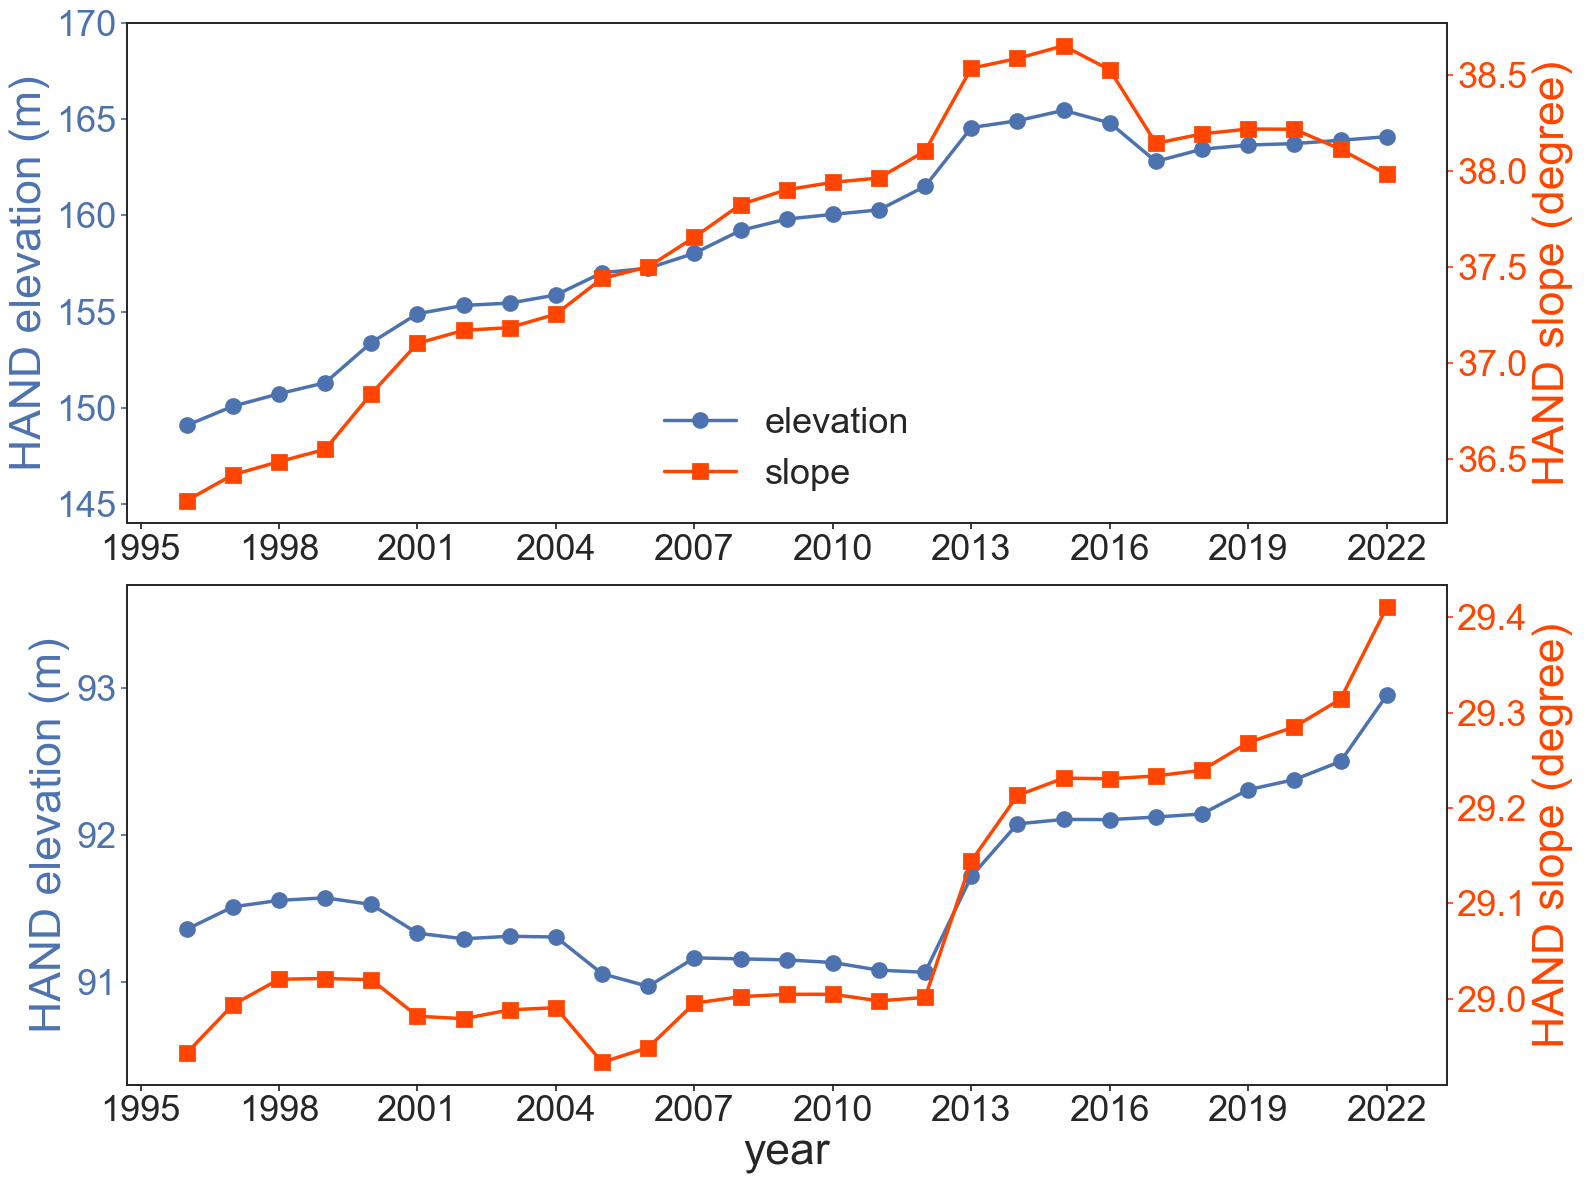

In [3]:
df_hand_topography = pd.read_excel(join(rootpath, 'results', 'hispaniola_hand_pwf_topography.xlsx'))

sns.set_theme(style="white")
figure_twin, axes_twin = plt.subplots(ncols=1, nrows=2, figsize=(16, 12))

ax = plt.subplot(2, 1, 1)

subplot_twin_axes(ax, list_year, df_hand_topography['haiti_elevation_pwf'].values,
                  df_hand_topography['haiti_slope_pwf'].values,
                  x_axis_interval=3, y_axis_interval=None, title=None, plot_legend=True,
                  y_label_left='HAND elevation (m)',
                  y_label_right='HAND slope (degree)',
                  y_left_lim=(144, 170), )

ax = plt.subplot(2, 1, 2)
subplot_twin_axes(ax, list_year, df_hand_topography['dr_elevation_pwf'].values,
                  df_hand_topography['dr_slope_pwf'].values,
                  x_axis_interval=3, y_axis_interval=None, title=None, plot_legend=False,
                  x_axis_label='year',
                  y_label_left='HAND elevation (m)',
                  y_label_right='HAND slope (degree)',
                  y_left_lim=(90.3, 93.7), )

plt.tight_layout()